<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Machine Learning Foundation***

## ***Bagging DEMO***

$ \ $

----

## ***Objectives***

After completing this demo you will be able to:

*   Understand what Bagging (empaquetado) is.

*   Recognize that Random Forests is an implementation of bagging and its abilities.

*   Describe the advantages of Random Forests over simply adding extra Decision Trees.

$ \ $

----

## ***Table of contents***

$(1)$ Setup.

$(2)$ Examining the Target and Preprocessing.

$(3)$ Random Forest and Out-of-bag Error.

$(4)$ Extra Trees.

$(5)$ Gathering Results.

$(6)$ Examining Results.

$ \ $

----

## ***Introduction***

We will be using the customer churn data from the telecom industry that we used in the KNN Lab. Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 

$$\color{aquamarine}{\text{'churndata_processed.csv'}}$$


$ \ $

---

## ***Import packages***

We import the necessary packages to use in this lab.

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

In [ ]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

$ \ $

-----

## ***Example (Setup).***

$ \ $

$(1)$  First, import that file and examine its contents.

In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

$ \ $

$(2)$  Output summary statistics and check variable data types.

In [ ]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


$ \ $

$(3)$  Using Seaborn, plot a heatmap of variable correlations.


<Axes: >

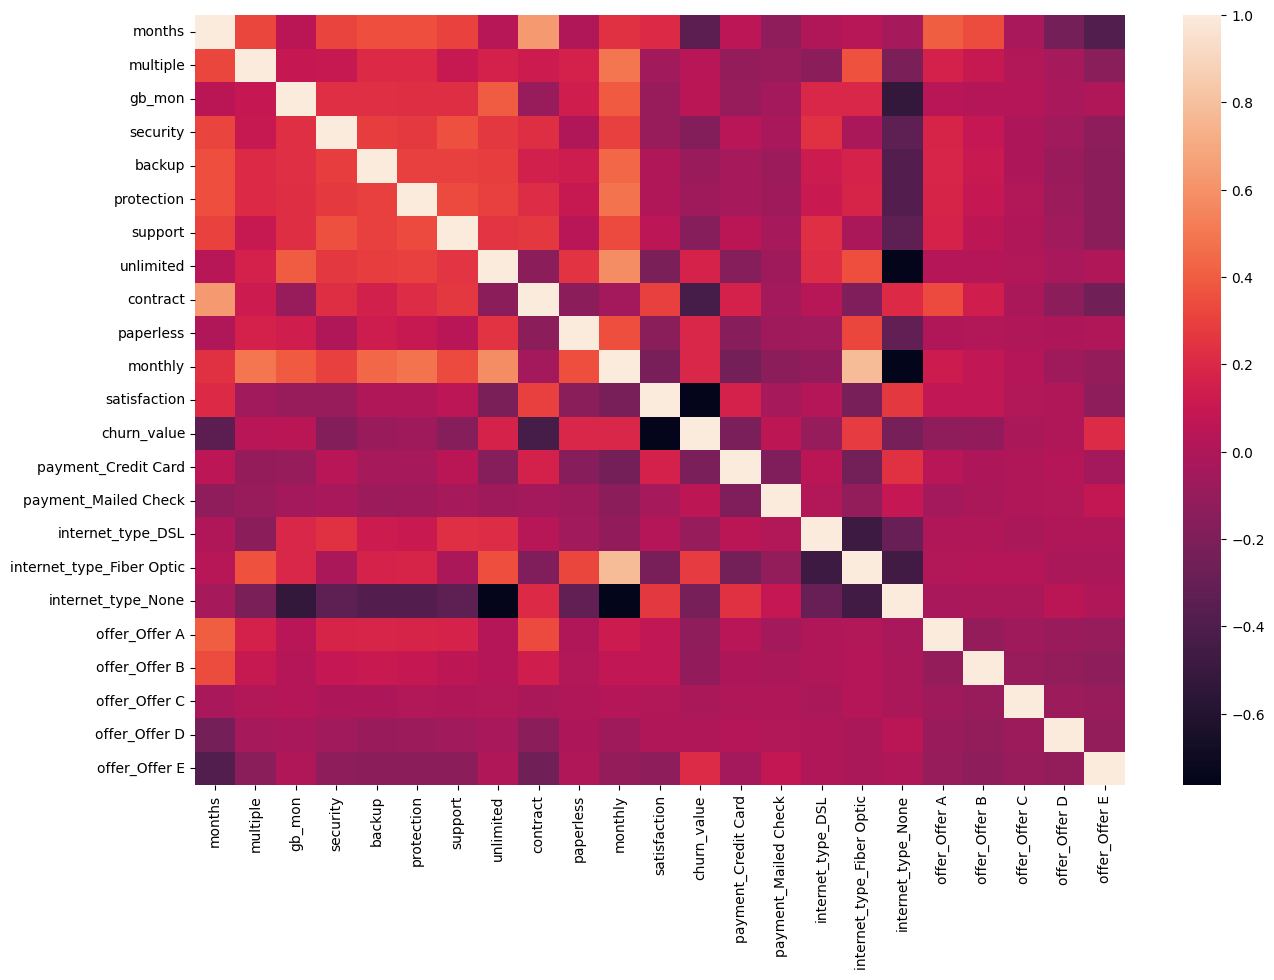

In [ ]:
fig, ax = plt.subplots(figsize = (15,10)) 
sns.heatmap(data.corr())

$ \ $

-----

## ***Exercise (Examining the Target and Preprocessing).***

$ \ $

$(1)$ Examine distribution of the predicted variable (`churn_value`).

In [ ]:
target = 'churn_value' 
data[target].value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [ ]:
data[target].value_counts(normalize = True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

$ \ $

$(2)$   Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution.

In [ ]:
# tomamos todas las columnas excepto la columna target = 'churn_value'
feature_cols = [x for x in data.columns if x != target]

# Dividimos los datos en dos partes con 1500 puntos en los datos de prueba. Esto crea un generador
strat_shuff_split = StratifiedShuffleSplit(n_splits = 1, test_size = 1500, random_state = 42)

# Obtenemos los valores de los índices del generador StratifiedShuffleSplit
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

# creamos los datos de entrenamiento
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

# creamos los datos de prueba
X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

$ \ $

$(3)$   Examine the distribution of the predictor variable in the train and test data.

In [ ]:
# examinamos la distribucion de la data de entrenamiento
y_train.value_counts(normalize = True)  

0    0.73462
1    0.26538
Name: churn_value, dtype: float64

In [ ]:
# examinamos la distribucion de la data de prueba
y_test.value_counts(normalize = True)

0    0.734667
1    0.265333
Name: churn_value, dtype: float64

$ \ $

----

## ***Exercise (Random Forest and Out-of-bag Error)***

$ \ $

$(1)$  Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.


In [ ]:
# Iniciamos el estimador de bosque aleatorio (random forest). Hay que tener en cuenta que la cantidad de árboles no está configurada aquí.
RF = RandomForestClassifier(oob_score = True, random_state = 42, warm_start = True, n_jobs = -1)

# creamos una lista vacia
oob_list = []

# creamos una lista de numeros, con los cuales realizaremos una iteracion en la siguiente sentencia
tree_numbers = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

# Iteramos a través de todas las posibilidades de la lista que describe el número de árboles
for n_trees in tree_numbers:
    
    # establecemos el numero de arboles
    RF.set_params(n_estimators = n_trees)

    # entrenamos el modelo RF con la data de entrenamiento
    RF.fit(X_train, y_train)

    # calculamos el error  
    oob_error = 1 - RF.oob_score_
    
    # creamos una serie con el diccionario dadocomo parametro
    serie = pd.Series({'n_trees': n_trees, 'oob': oob_error})

    # pegamos la serie en la lista que creamos al inicio
    oob_list.append(serie)


In [ ]:
# concatenamos las series de la lista creada anteriormente, luego realizamos la transpuesta para organizar los datos
rf_oob_df = pd.concat(oob_list, axis = 1).T.set_index('n_trees')

# mostramos nuestro dataframe en pantalla
rf_oob_df

,oob
n_trees,
15.0,0.055566
20.0,0.052138
30.0,0.049973
40.0,0.048890
50.0,0.049071
100.0,0.047447
150.0,0.046726
200.0,0.047447
300.0,0.047988


$ \ $

$(2)$  Plot the resulting oob errors as a function of the number of trees.

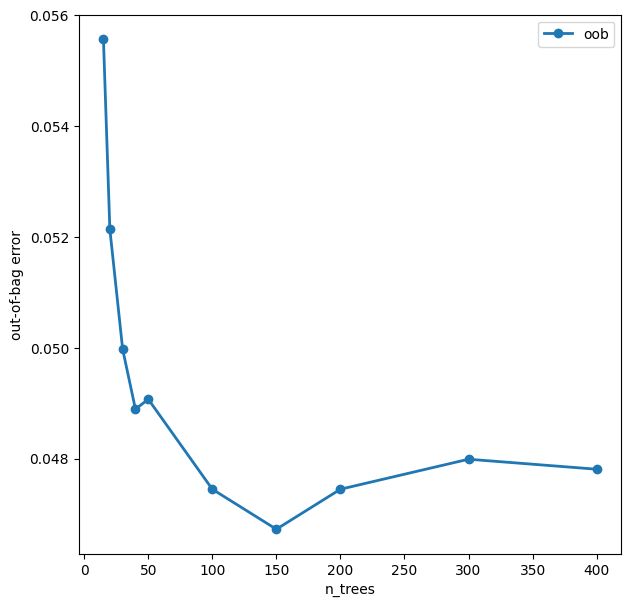

In [ ]:
ax = rf_oob_df.plot(marker = 'o', figsize = (7, 7), linewidth = 2)
ax.set(ylabel = 'out-of-bag error');

$ \ $

----

## ***Exercise (Extra Trees)***

$ \ $

$(1)$ Repeat the previous exercise using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.

In [ ]:
# Iniciamos el estimador de bosque aleatorio. Tenga en cuenta que la cantidad de árboles no está configurada aquí
EF = ExtraTreesClassifier(oob_score = True, random_state = 42, warm_start = True, bootstrap = True, n_jobs = -1)

# creamos una lista vacia
oob_list = []

# creamos una lista de numeros, con los cuales realizaremos una iteracion en la siguiente sentencia
tree_numbers = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

# realizamos una iteracion sobre los numeros de la lista anterior
for n_trees in tree_numbers:
    
    # establecemos el número de árboles
    EF.set_params(n_estimators = n_trees)

    # entrenamos nuestro modelo con la data de entrenamiento X_train, y_train
    EF.fit(X_train, y_train)

    # error oob 
    oob_error = 1 - EF.oob_score_

    # cremaos una serie que describe el error oob
    serie = pd.Series({'n_trees': n_trees, 'oob': oob_error})

    # pegamos la serie en nuestra lista vacia
    oob_list.append(serie)

In [ ]:
# concatenamos las series de la lista oob_list y luego tomamos la transpuesta
et_oob_df = pd.concat(oob_list, axis = 1).T.set_index('n_trees')

# mostramos nuestro dataframe en pantalla
et_oob_df

,oob
n_trees,
15.0,0.066570
20.0,0.063864
30.0,0.057550
40.0,0.053942
50.0,0.052318
100.0,0.051236
150.0,0.048890
200.0,0.048530
300.0,0.049612


$ \ $

$(2)$  Compare the out-of-bag errors for the two different types of models.

In [ ]:
# concatenamos los 2 frames construidos anteriormente
oob_df = pd.concat([rf_oob_df.rename(columns = {'oob':'RandomForest'}),  et_oob_df.rename(columns = {'oob':'ExtraTrees'})], axis = 1)

# mostramos nuestro resultado en pantalla
oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.055566,0.066570
20.0,0.052138,0.063864
30.0,0.049973,0.057550
40.0,0.048890,0.053942
50.0,0.049071,0.052318
100.0,0.047447,0.051236
150.0,0.046726,0.048890
200.0,0.047447,0.048530
300.0,0.047988,0.049612


$ \ $

$(3)$  Compare the out-of-bag errors using a plot.

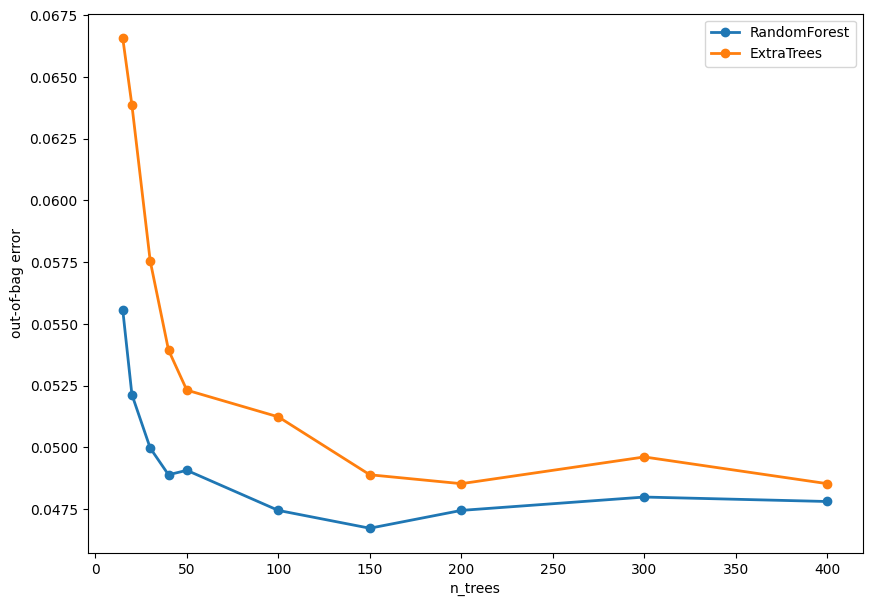

In [ ]:
ax = oob_df.plot(marker = 'o', figsize = (10, 7), linewidth = 2)
ax.set(ylabel = 'out-of-bag error');

$ \ $

----

## ***Example (Gathering Results)***

$ \ $

$(1)$ Select one of the models that performs well.

In [ ]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators = 100)

y_pred = model.predict(X_test)

$ \ $

$(2)$ Calculate error metrics.

In [ ]:
# y_pred = model.predict(X_test)
# y_test = data.loc[test_idx, target]

# si ocurre un problema con recall_score(y_test, y_pred), es necesario importar en este item la libreria correspondiente
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index = pd.Index([0]))

score_df

,accuracy,precision,recall,f1,auc
0,0.94,0.9375,0.829146,0.88,0.904591


$ \ $

$(3)$  Given the distribution of the predicted class,

* Which metric is most important? 

* Which could be deceiving (engañoso)?


$ \ $

$(3)$ Calculate the confusion matrix on the test data set and visualize it.

In [ ]:
# creamos la matriz de confusion relativa a los datos y_test, y_pred
con_mat = confusion_matrix(y_test, y_pred)

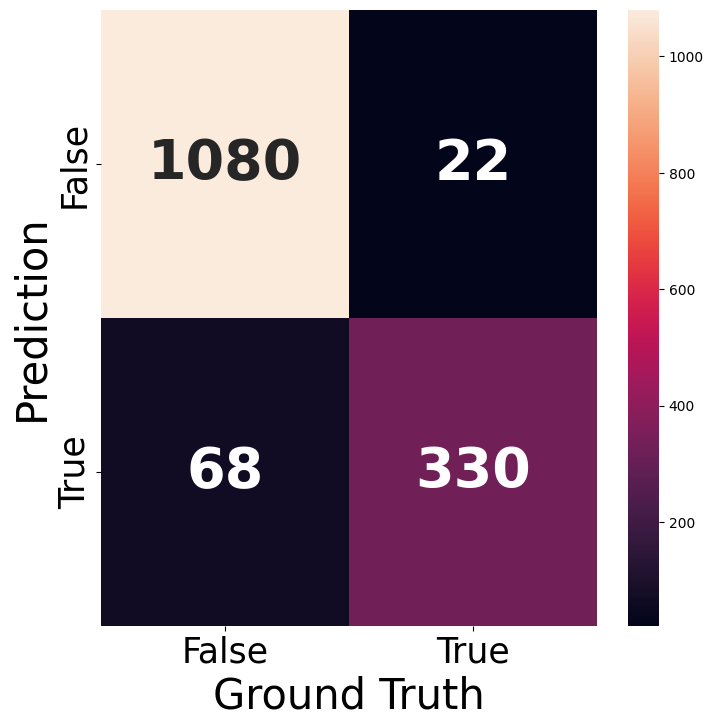

In [ ]:
# creamos una figura donde realizaremos nuestro plot
fig, ax = plt.subplots(figsize = (8,8))

# creamos un mapa de calor con la matriz de confusion con_mat
ax = sns.heatmap(con_mat, annot = True, fmt = 'd', annot_kws = {"size": 40, "weight": "bold"})

# establecemos las etiquetas del eje x, y le damos tamaño a la fuente
ax.set_xticklabels(['False', 'True'], fontsize = 25)

# establecemos las etiquetas del eje y, y le damos tamaño a la fuente
ax.set_yticklabels(['False', 'True'], fontsize = 25)

# le damos titulo al eje x
ax.set_ylabel('Prediction', fontsize = 30)

# le damos titulo al eje y
ax.set_xlabel('Ground Truth', fontsize = 30);

$ \ $

$(4)$ Visualize the ROC-AUC and precision-recall curves.

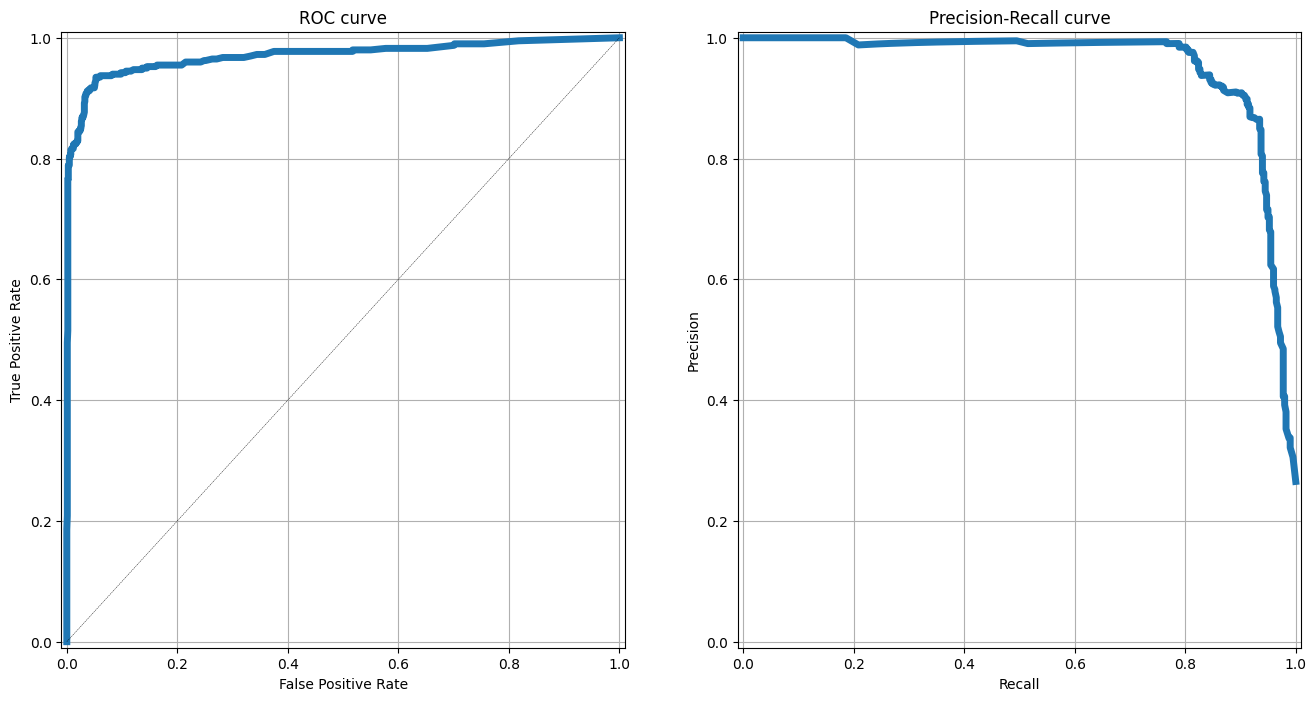

In [ ]:
# creamos una imagen para realizar varios subplots. En este caso, nuestro plot solo tendra 2 imagenes en fila
fig, axList = plt.subplots(ncols = 2)

#  establecemos el tamaño de la imagen en pulgadas
fig.set_size_inches(16, 8)

# Obtenemos las probabilidades para cada una de las dos categorías.
# model = RF.set_params(n_estimators = 100)
y_prob = model.predict_proba(X_test)

#############################################################################################################
# Creamos la primera imagen. Esta imagen corresponde a la curva ROC-AUC
ax = axList[0]

# describimos la data de la curva roc con la data y_test, y_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

# hacemos el dibujo de la curva roc
ax.plot(fpr, tpr, linewidth = 5)


# Es costumbre dibujar una línea punteada diagonal en los gráficos ROC.
# Esto es para indicar una predicción completamente aleatoria. 
# la línea punteada hacia la esquina superior izquierda representa el poder del modelo.
# creamos la linea y=x en el plot
ax.plot([0, 1], [0, 1], ls = '--', color = 'black', lw = 0.3)

# establecemos la etiqueta de los ejes y demas
ax.set(xlabel = 'False Positive Rate',
       ylabel = 'True Positive Rate',
       xlim = [-0.01, 1.01], 
       ylim = [-0.01, 1.01],
       title = 'ROC curve') 

# realizamos una cuadricula en el primer plot
ax.grid(True)


#############################################################################################################
## Creamos la segunda imagen. Esta imagen corresponde a la curva  precision-recall 
ax = axList[1]

# describimos la data de la curva de precision con la data y_test, y_prob[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])

# hacemos el dibujo de la curva de precision
ax.plot(recall, precision, linewidth = 5)

# establecemos las etiquetas de los ejes y demas
ax.set(xlabel = 'Recall', ylabel = 'Precision',
       xlim = [-0.01, 1.01],
       ylim = [-0.01, 1.01],
       title = 'Precision-Recall curve')

# realizamos una cuadricula en el segundo plot
ax.grid(True)

$ \ $

----

## ***The feature importances.***

***Total daily*** cost is the biggest predictor of customer churn.

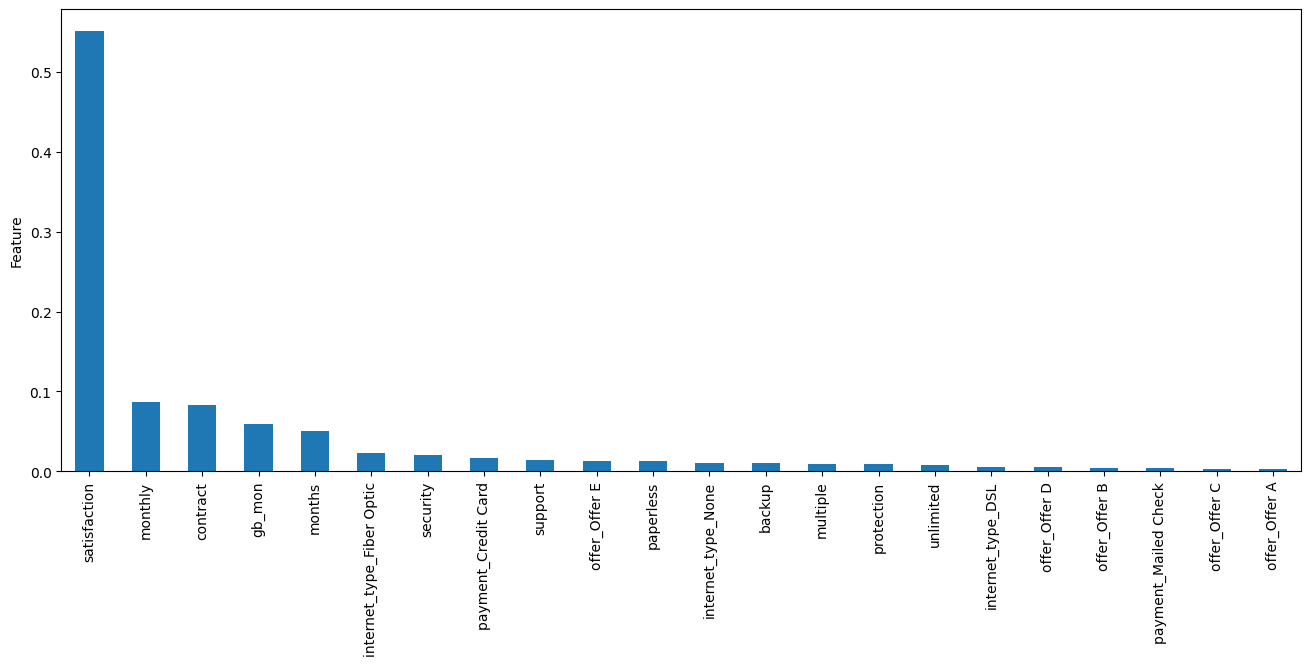

In [ ]:
# describimos una serie que nos muestra los rasgos de importancia ordenados de mayor a menor
feature_imp = pd.Series(model.feature_importances_, index = feature_cols).sort_values(ascending = False)

# realizamos un plot de la serie anterior
ax = feature_imp.plot(kind = 'bar', figsize = (16, 6))

# establecemos la etiqueta del eje y
ax.set(ylabel = 'Feature');